# Homework 2

Imports

In [1]:
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import urllib
import matplotlib.patches as mpatches

Part a. Degree Distribution in FMH data (2 points)
-----------------

Load Faux Magnolia High data. This is an artificial social network created to be statistically highly similar to a friendship network observed at a large high school in the southern United States as part of the Adolescent Health Study.

In [2]:
url = "http://josquin.cti.depaul.edu/~rburke/courses/s14/fmh.graphml"

with urllib.request.urlopen(url) as response:
    fmh = nx.read_graphml(response)

In [3]:
list(fmh.nodes(data=True))[0:5]

[('n0',
  {'Grade': 9.0,
   'na': False,
   'Race': 'Black',
   'Sex': 'F',
   'vertex.names': '1'}),
 ('n1',
  {'Grade': 10.0,
   'na': False,
   'Race': 'Black',
   'Sex': 'M',
   'vertex.names': '2'}),
 ('n2',
  {'Grade': 12.0,
   'na': False,
   'Race': 'Black',
   'Sex': 'F',
   'vertex.names': '3'}),
 ('n3',
  {'Grade': 11.0,
   'na': False,
   'Race': 'Hisp',
   'Sex': 'F',
   'vertex.names': '4'}),
 ('n4',
  {'Grade': 9.0,
   'na': False,
   'Race': 'Black',
   'Sex': 'F',
   'vertex.names': '5'})]

Plot the degree distribution of the FMH network. The maximum node degree is 8, so use bins from 0 to 8. Fractional size bins don't make any sense with a discrete value like degree. You can try using seaborns' distplot for this.


(array([524., 403., 271., 128.,  85.,  30.,  13.,   7.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 8 Patch objects>)

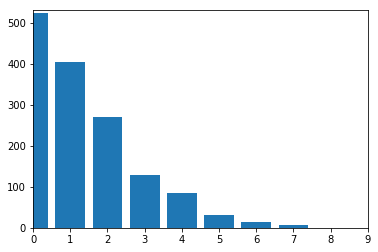

In [6]:
plt.ylim(0,530)
plt.xlim(0,9)
fmh_deg = dict(nx.degree(fmh))
plt.hist(fmh_deg.values(),bins = [0,1,2,3,4,5,6,7,8], rwidth=0.8, align='left')

Use sp.bincount() to compute the number of values for each degree (essentially the histogram values). 

In [5]:
x = list(fmh_deg.values())
fmh_array = sp.bincount(x)


Plot A: Do an x/y plot of the bincount data using a log/log scale (`plt.loglog`). Use "r-o" to get a line plus dot glyphs for each data point.

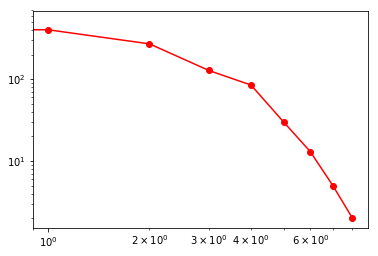

In [6]:
plt.loglog(fmh_array, "r-o")

Plot B: Do an x/y plot of the bincount data using a log scale for y only (`plt.semilogy`). Use "b-o" for the glyph type.

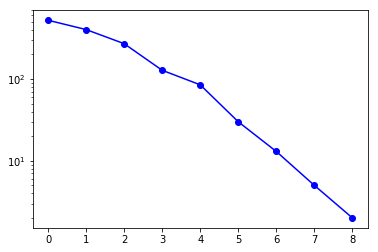

In [7]:
plt.semilogy(fmh_array, "b-o")

Part b. Translating String Attributes (2 points)
---------------------

Create two new attributes RaceN and GenderN where the race and gender attributes are translated as in the dictionary here.


In [8]:
race_dict = { u'Asian': 0, u'Black': 1, u'Hisp': 2, 
             u'NatAm' : 3, u'Other': 4,u'White' : 5}
gender_dict = { u'F':0, u'M':1}

In [9]:
start_race = dict(nx.get_node_attributes(fmh, 'Race'))
items = {}

for key in start_race.keys():
    val = start_race[key]
    val2 = race_dict[val]
    items[key] = val2
nx.set_node_attributes(fmh, items, 'RaceN')

items.clear()

start_gender = dict(nx.get_node_attributes(fmh, 'Sex'))

for key in start_gender.keys():
    val = start_gender[key]
    val2 = gender_dict[val]
    items[key] = val2
nx.set_node_attributes(fmh, items, 'GenderN')


Your attribute translation is correct for RaceN if the following code produces the following output:
`array([  48,  261,   68,   24,    7, 1053])`

In [10]:
RaceN = dict(nx.get_node_attributes(fmh, 'RaceN'))
print(sp.bincount(list(RaceN.values())))

GenderN = dict(nx.get_node_attributes(fmh, 'GenderN'))
print(sp.bincount(list(GenderN.values())))

[  48  261   68   24    7 1053]
[768 693]


Part c. Subgraph with the Giant Component (2 points)
------------------

Create a subgraph containing only the giant component.

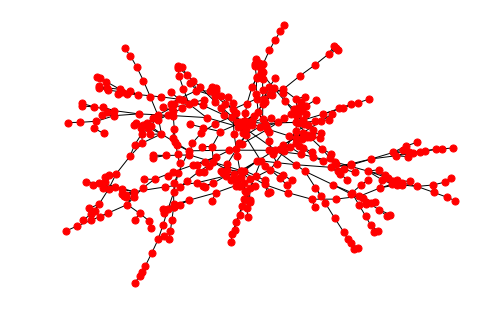

In [41]:
tempList = list(nx.connected_components(fmh))
giant_comp = nx.subgraph(fmh, tempList[1])

nx.draw(giant_comp, node_size=50)


Save these two graphs in GraphML format.

In [12]:
nx.write_graphml(fmh, "fmh.graphml")
nx.write_graphml(giant_comp, "giant_comp.graphml")

Part d. Racial Makeup of the Giant Component (2 point)
-------------------

Using `sp.bincount()` compute the number of students of each race in the whole school and in the giant component.

In [13]:
raceN_array_fmh = sp.bincount(list(RaceN.values()))

RaceN_dict_gc = dict(nx.get_node_attributes(giant_comp, 'RaceN'))
GenderN_dict_gc = dict(nx.get_node_attributes(giant_comp, 'GenderN'))

raceN_array_gc = sp.bincount(list(RaceN_dict_gc.values()))

Compute the fraction of students of each race in the whole school and in the giant component.

In [14]:
perc_race_fmh = []
whole_population = sum(raceN_array_fmh)

for race in raceN_array_fmh:
    perc = race/whole_population
    perc_race_fmh.append(round(perc, 4))
print(perc_race_fmh)


perc_race_gc = []
whole_population_gc = sum(raceN_array_gc)

for race in raceN_array_gc:
    perc = race/whole_population_gc
    perc_race_gc.append(round(perc, 4))
print(perc_race_gc)

[0.0329, 0.1786, 0.0465, 0.0164, 0.0048, 0.7207]
[0.0319, 0.1207, 0.0319, 0.0137, 0.0046, 0.7973]


Plot the fractions of each race in the different components in a side-by-side bar plot. See Example Plot 1 in assignment handout.

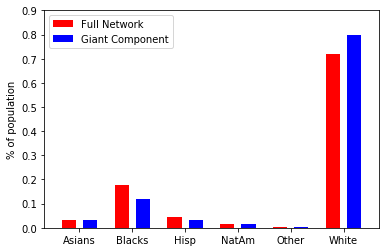

In [15]:
gridnumber = list(range(1,19))


race_fmh_bar = plt.bar([1,4,7,10,13,16], perc_race_fmh, width=0.8, color='r', label="Full Network",align='edge')
race_gc_bar = plt.bar([3,6,9,12,15,18], perc_race_gc, width=-0.8, color ='b', label="Giant Component",align='edge')

plt.ylim([0,.9])
plt.xlim([0,19])
plt.ylabel("% of population")
plt.xticks([2,5,8,11,14,17],("Asians","Blacks","Hisp","NatAm","Other","White"))
plt.legend()
plt.show()

Question: What conclusion about the composition of the giant component can be drawn from this plot?

The composition of the giant graph is primarily dominated by the "White" race. It would seem that when dropping/excluidng the smaller sized components (which constructed mostly of minority races) the "White" fraction of students seemed to maintain their group composition, therefore their population percentage actually increased while the minority groups population percentage took a dive.

### Part e. Female/Male Degree Distribution (2 points)
-----------------------

Compute the degree distribution for the female and male students in the population. (Whole graph). (You can use `bincount` for this, too.)

In [79]:
sexes = dict(nx.get_node_attributes(fmh, "Sex"))
dict_males = {}
dict_females ={}
degree_dict = dict(fmh.degree())

for gender in sexes:
    if(sexes[gender]=='M'):
        dict_males[gender]='M'
    else:
        dict_females[gender]='F'

for person in dict_males:
    degree = degree_dict[person]
    dict_males[person]= degree

for person in dict_females:
    degree = degree_dict[person]
    dict_females[person]= degree

# dict_males now contains the node/person and associated degree value (only males)
# same with dict_females BUT only females



Plot the degree distributions using a line plot. See Example Plot 2.

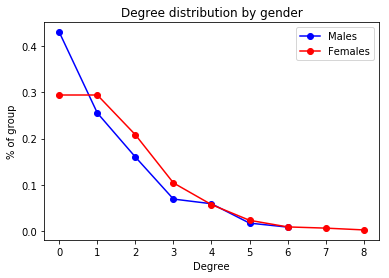

In [28]:
listOfDegs = [0,0,0,0,0,0,0]
tot_male = len(dict_males)
perc_deg_male = []

for male in dict_males:
    index = dict_males[male]
    listOfDegs[index]+=1
    
for deg in listOfDegs:
    perc = deg/tot_male
    perc_deg_male.append(round(perc, 4))

listOfDegs = [0,0,0,0,0,0,0,0,0]
tot_female = len(dict_females)
perc_deg_female = []

for female in dict_females:
    index = dict_females[female]
    listOfDegs[index]+=1
    
for deg in listOfDegs:
    perc = deg/tot_female
    perc_deg_female.append(round(perc, 4))

#males_line = plt.plot(dict_males.values()) # work in progress
males_line = plt.plot([0,1,2,3,4,5,6], perc_deg_male,'b-o',label="Males")
females_line = plt.plot([0,1,2,3,4,5,6,7,8], perc_deg_female,'r-o',label="Females")
plt.ylabel("% of group")
plt.title("Degree distribution by gender")
plt.xlabel('Degree')
plt.legend()
plt.show()

Question: What can you conclude from this plot?


The two plots are similar in many ways. A very small percentage of male and female students have more than 4 or more degrees. The difference can be seen in the beginning where both plots decline. As you can see the male plot takes a steady decline the higher the degree gets to degree value 4, which shows that more males tend to enjoy having only a few close ties, it is more rare for a male to have ties of 4 or more. More males seem to like having no degree at all, a little more than 40% of the male population, but only 30% of the female population has 0 degrees. From 0 degrees to 1 degree is where the males plot takes it's largest dip, females however maintain a linear slope.

### Part f:	Segregation calculation (2 pts)


We will define the segregation of a node as the fraction of the neighbor nodes with the same Race attribute. Should return a dictionary with this value for each node. You may want to write an intermediate function that does the calculation for one node, but that function will have to take the graph as an argument because `neighbors()` is a Graph function. You will have to account for nodes with no neighbors. They should return an Inf value `float('inf')`.

In [49]:
def segr(graph, node, att):
    attr_dict = dict(nx.get_node_attributes(fmh, att))
    brothers = list(graph.neighbors(node))
    if(len(brothers) == 0):
        return float('inf')
    
    count = 0;
    size = len(brothers)
    for bro in brothers:
        if(attr_dict[bro] == attr_dict[node]):
            count = count +1
    return count/size

In [54]:
fmh1 = fmh.copy()

Using your function calculate the segregation values for the whole graph.

In [82]:
seg_race = {}
seg_sex = {}

for node in fmh1.nodes():
    seg_race[node] = round(segr(fmh1, node, 'Race'), 2)
    
for node in fmh1.nodes():
    seg_sex[node] = round(segr(fmh1, node, 'Sex'), 2)


Calculate average segregation for male and female students. Ignore the singleton nodes. Use `sp.isinf()` to check for the Inf values. Hint: The value for female students should be between 0.80 and 0.81.

In [96]:
fmh2 = fmh.copy()
#print(len(fmh2))
fmh2.remove_nodes_from(list(nx.isolates(fmh2)))
#print(len(fmh2))

male_seg = seg_sex.copy()
female_seg = seg_sex.copy()


for node in dict_males:
    del female_seg[node]
#print(len(female_seg))
for node in dict_females:
    del male_seg[node]
#print(len(male_seg))
    

femaleSeg_values = list(female_seg.values())
sizeFemales = len(femaleSeg_values)
print(sizeFemales)
sum1 = 0

for val in femaleSeg_values:
    if(sp.isinf(val)==False):
        sum1 = sum1 + val
    else: sizeFemales-=1

#avg_females = round(sum(femaleSeg_values)/sizeFemales,2)
print(sum1/sizeFemales)












768
0.7837084870848711
